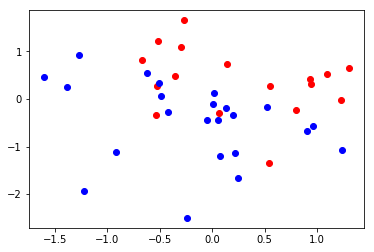

[0.83981542]


In [13]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import time

# definition of constant values
n = 40
lam = 1

# create dataset
omega = np.random.randn(1)
noise = 0.8 * np.random.randn(n)
x = np.random.randn(n, 2)
y = np.where(omega * x[:, 0] + x[:, 1] + noise > 0, 1, -1)

# plot dataset
def plot_dataset(show=True, axes=plt):
    for data, label in zip(x,y):
        color= 'b' if label < 0 else 'r'
        axes.plot(data[0], data[1], color+'o')
    if show: plt.show()
        
plot_dataset()
print(omega)

In [14]:
# declation of variables
w1 = Symbol('w1')
w2 = Symbol('w2')
w = np.array([w1, w2])

# define J(w)
j = sum([log(exp(tmp) + 1) for tmp in -y * np.sum(w * x, axis=1)]) + lam * sum(w * w) 
    

# batch steepest gradient method
def gradient_method(epoch=10, lr=0.2):
    grad = diff(j, w)
    omega = np.ones_like(w)
    js = []
    t = time.time()
    for step in range(epoch + 1):
        js.append(j.subs([(w1, omega[0]), (w2, omega[1])]))
        print('{:02d} step:\tJ={}\tw={}'.format(step, js[step], omega))
        omega = omega - lr * grad.subs([(w1, omega[0]), (w2, omega[1])])
    print("Finish training in {} ms.".format(time.time() - t))
        
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
    # plot J_t
    axL.plot(np.arange(epoch+1), np.array(js))
    # plot datasets and draw boundary
    axR.set_ylim([x[:, 1].min() - 1, x[:, 1].max() + 1])
    v1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
    v2 = - omega[0] / omega[1] * v1
    axR.plot(v1, v2, 'g-')
    plot_dataset(False, axes=axR)
    
    
# Newton based method
def newton_method(epoch=10):
    t= time.time()
    omega = np.ones_like(w)
    d1, d2 = Symbol('d1'), Symbol('d2')
    d = np.array([d1, d2])
    js = []
    for step in range(epoch + 1):
        js.append(j.subs([(w1, omega[0]), (w2, omega[1])]))
        print('{:02d} step:\tJ={}\tw={}'.format(step, js[step], omega))
        grad = diff(j, w).subs([(w1, omega[0]), (w2, omega[1])])
        hesian = np.array(diff(j, w, 2).subs([(w1, omega[0]), (w2, omega[1])])).reshape(2, 2)
        omega  += np.array(list(solve(np.dot(hesian, d) + grad).values()))
    print("Finish training in {} ms.".format(time.time() - t))
        
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
    # plot J_t
    axL.plot(np.arange(epoch+1), np.array(js))
    # plot datasets and draw boundary
    axR.set_ylim([x[:, 1].min() - 1, x[:, 1].max() + 1])
    v1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
    v2 = - omega[0] / omega[1] * v1
    axR.plot(v1, v2, 'g-')
    plot_dataset(False, axes=axR)

00 step:	J=21.9264924499098	w=[1 1]
01 step:	J=21.7178228278489	w=[0.679019685072472 1.27941493066283]
02 step:	J=21.6552306053027	w=[0.839956264216860 1.12058279273235]
03 step:	J=21.6391808643693	w=[0.752194262257131 1.19862238926959]
04 step:	J=21.6345544489005	w=[0.797587537745709 1.15574640712548]
05 step:	J=21.6332834509080	w=[0.773307960728506 1.17799877516712]
06 step:	J=21.6329238021497	w=[0.786088402470831 1.16609373865429]
07 step:	J=21.6328235033523	w=[0.779301232472692 1.17236269287954]
08 step:	J=21.6327953070072	w=[0.782889253721824 1.16903363957466]
09 step:	J=21.6327874132297	w=[0.780987818054905 1.17079364380633]
10 step:	J=21.6327851983850	w=[0.781994172466156 1.16986096665549]
Finish training in 2.7650609016418457 ms.


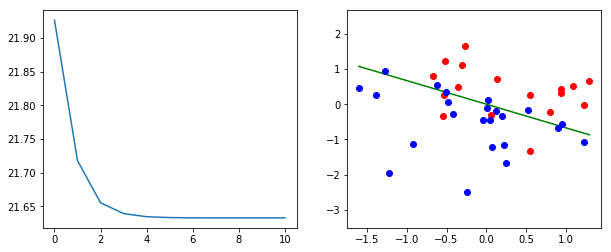

In [15]:
# run the batch steepest gradient method and show the result.
gradient_method()

00 step:	J=21.9264924499098	w=[1 1]
01 step:	J=21.6330266050844	w=[0.775253926351857 1.16245342439376]
02 step:	J=21.6327843369042	w=[0.781634005880421 1.17016580571920]
03 step:	J=21.6327843357948	w=[0.781645668352821 1.17018365628886]
04 step:	J=21.6327843357948	w=[0.781645668401554 1.17018365637756]
05 step:	J=21.6327843357948	w=[0.781645668401555 1.17018365637756]
06 step:	J=21.6327843357948	w=[0.781645668401555 1.17018365637756]
07 step:	J=21.6327843357948	w=[0.781645668401555 1.17018365637756]
08 step:	J=21.6327843357948	w=[0.781645668401555 1.17018365637756]
09 step:	J=21.6327843357948	w=[0.781645668401555 1.17018365637756]
10 step:	J=21.6327843357948	w=[0.781645668401555 1.17018365637756]
Finish training in 23.492314100265503 ms.


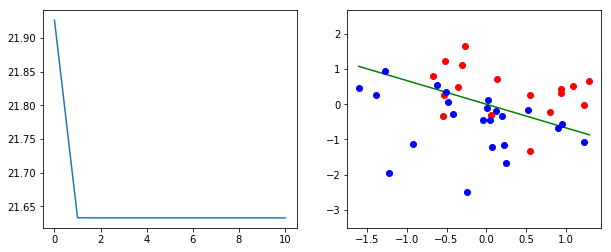

In [16]:
# run the Newton based method and show the result.
newton_method()